MAE: 0.422
Config: {}
Train R² Score: 1.0000
Test R² Score: 0.5680
Mean Absolute Error: 0.432


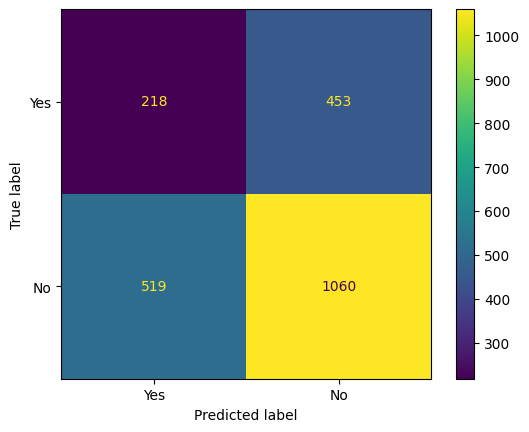

		Logistic Regression Classification Report:
		-----------------------------------------
              precision    recall  f1-score   support

           0       0.30      0.32      0.31       671
           1       0.70      0.67      0.69      1579

    accuracy                           0.57      2250
   macro avg       0.50      0.50      0.50      2250
weighted avg       0.58      0.57      0.57      2250

Optimal Threshold: inf


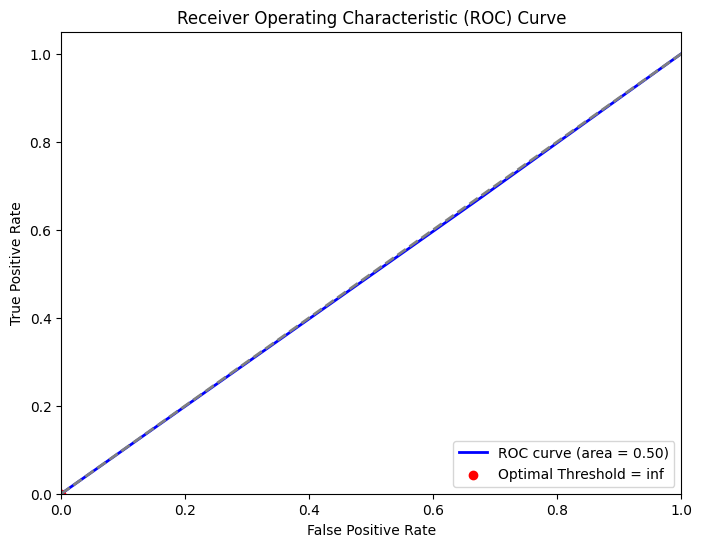

{'mae': 0.432,
 'mae_best_score': np.float64(-0.4220740740740741),
 'mae_best_params': {},
 'y_pred': array([1, 1, 1, ..., 1, 1, 1], shape=(2250,)),
 'pred_df':       Age  Gender MaritalStatus EducationLevel EmploymentStatus  AnnualIncome  \
 2642   62  Female       Widowed         Master          Retired        118314   
 2669   50  Female      Divorced       Bachelor          Student         48782   
 1366   47    Male       Married       Bachelor       Unemployed         63261   
 8972   19  Female       Widowed    High School          Student         33807   
 511    39  Female       Widowed    High School    Self-employed        127146   
 ...   ...     ...           ...            ...              ...           ...   
 1246   22    Male      Divorced    High School         Employed         74012   
 7743   43  Female       Widowed            PhD          Student         63064   
 8233   42  Female       Married         Master          Retired        104739   
 7271   36  Female  

In [1]:
from myproject.mypackage.pipeline import validateParams, runPipeline, find_outliers_z
import pandas as pd
import numpy as np
import seaborn as sns

df = pd.read_csv("synthetic_loan_data.csv")
df.drop(columns=['CustomerID','Name'], inplace=True)
df
X = df.drop(columns='LoanApproved')
y = df['LoanApproved']

result = runPipeline(X, y, {'model_name': 'tree','max_iter': 10000,'test_size': None})

result['pipeline_results']

MAE: 0.065
Config: {'log_reg__max_iter': 10000}
Train R² Score: 0.9356
Test R² Score: 0.9348
Mean Absolute Error: 0.06519933554817275


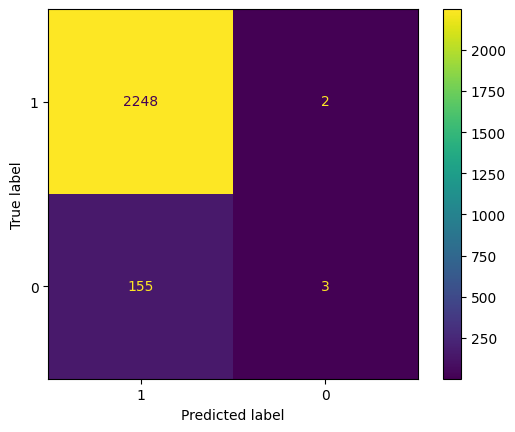

		Logistic Regression Classification Report:
		-----------------------------------------
              precision    recall  f1-score   support

           0       0.94      1.00      0.97      2250
           1       0.60      0.02      0.04       158

    accuracy                           0.93      2408
   macro avg       0.77      0.51      0.50      2408
weighted avg       0.91      0.93      0.91      2408

Optimal Threshold: 0.0909


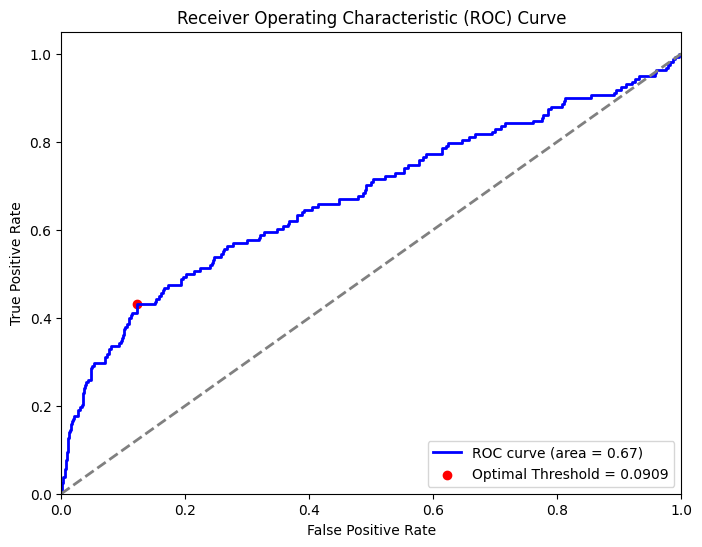

In [2]:
df = pd.read_csv("Credit.csv")

y = df['Credit']
X = df.drop(columns='Credit')

result = runPipeline(X, y, {'model_name': 'log_reg','max_iter': 10000})

MAE: 0.063
Config: {'log_reg__max_iter': 10000}
Train R² Score: 0.9377
Test R² Score: 0.9324
Mean Absolute Error: 0.06758019308626596


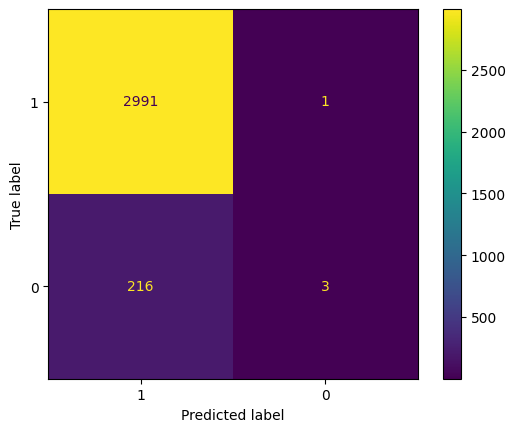

		Logistic Regression Classification Report:
		-----------------------------------------
              precision    recall  f1-score   support

           0       0.93      1.00      0.96      2992
           1       0.75      0.01      0.03       219

    accuracy                           0.93      3211
   macro avg       0.84      0.51      0.50      3211
weighted avg       0.92      0.93      0.90      3211

Optimal Threshold: 0.0884


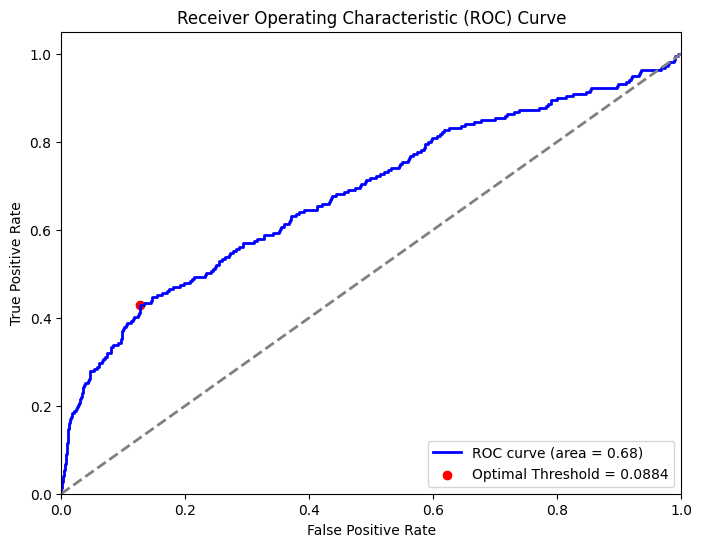

In [3]:
df = pd.read_csv("Credit.csv")

y = df['Credit']
X = df.drop(columns='Credit')

result = runPipeline(X, y, {'model_name': 'log_reg','max_iter': 10000,'test_size': .4,'scaler':'min_max_scaler'})


MAE: 0.069
Config: {}
Train R² Score: 0.9537
Test R² Score: 0.9290
Mean Absolute Error: 0.07100591715976332


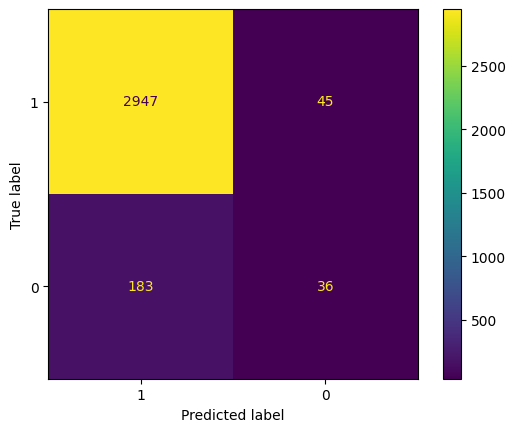

		Logistic Regression Classification Report:
		-----------------------------------------
              precision    recall  f1-score   support

           0       0.94      0.98      0.96      2992
           1       0.44      0.16      0.24       219

    accuracy                           0.93      3211
   macro avg       0.69      0.57      0.60      3211
weighted avg       0.91      0.93      0.91      3211

Optimal Threshold: 0.3333


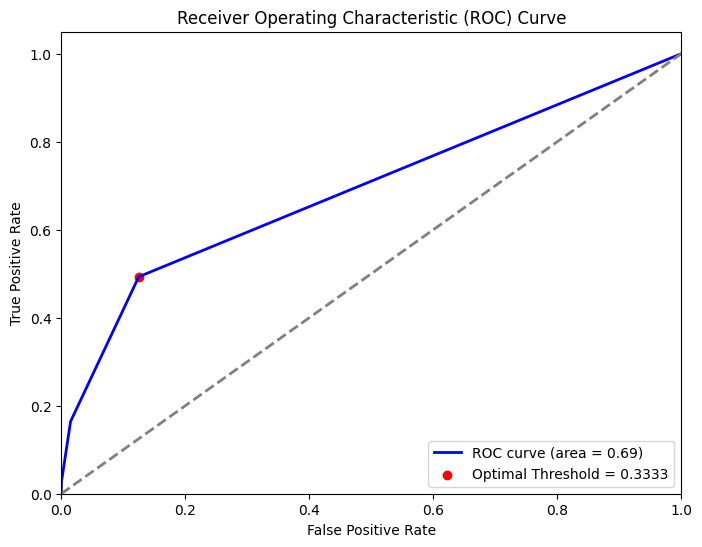

In [4]:
df = pd.read_csv("Credit.csv")
for index, col in enumerate(df.drop(columns='Credit').columns):
    z_scores, mask, median = find_outliers_z(df, col)
    #print(f"{col}: {find_outliers_z(df, col)[1].count()[0]}")
    #print(find_outliers_z(df, col)[2])
    df.loc[df[col].index[mask], col] = np.nan

y = df['Credit']
X = df.drop(columns='Credit')

result = runPipeline(X, y, {'model_name': 'knn','max_iter': 10000,'neighbors': 5,'test_size': .4})